In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [8]:
mall = pd.read_csv('Mall_Customers.csv')
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
len(mall)

200

In [10]:
mall['CustomerID'].nunique()

200

In [11]:
len(mall[mall.duplicated()])

0

In [12]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
mall.drop(columns=['CustomerID'] , inplace=True)
mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


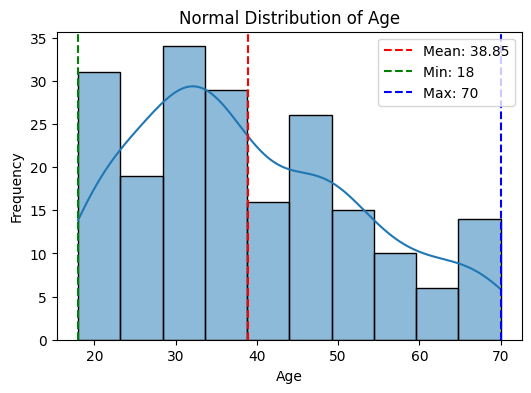

In [14]:
mean_age = mall['Age'].mean()
min_age = mall['Age'].min()
max_age = mall['Age'].max()

# Plotting the normal distribution for 'Age'
plt.figure(figsize=(6, 4))
sns.histplot(mall['Age'], kde=True, bins=10)
plt.axvline(mean_age, color='r', linestyle='--', label=f'Mean: {mean_age:.2f}')
plt.axvline(min_age, color='g', linestyle='--', label=f'Min: {min_age}')
plt.axvline(max_age, color='b', linestyle='--', label=f'Max: {max_age}')

# Add titles and labels
plt.title('Normal Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()

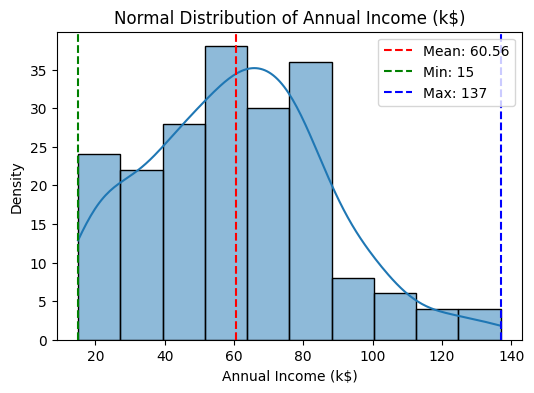

In [15]:
mean_income = mall['Annual Income (k$)'].mean()
min_income = mall['Annual Income (k$)'].min()
max_income = mall['Annual Income (k$)'].max()

# Plotting the normal distribution for 'Annual Income (k$)'
plt.figure(figsize=(6, 4))
sns.histplot(mall['Annual Income (k$)'], kde=True)
plt.axvline(mean_income, color='r', linestyle='--', label=f'Mean: {mean_income}')
plt.axvline(min_income, color='g', linestyle='--', label=f'Min: {min_income}')
plt.axvline(max_income, color='b', linestyle='--', label=f'Max: {max_income}')

# Add titles and labels
plt.title('Normal Distribution of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()

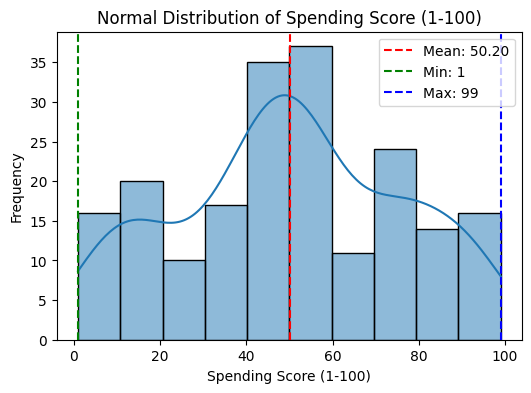

In [16]:
mean_score = mall['Spending Score (1-100)'].mean()
min_score = mall['Spending Score (1-100)'].min()
max_score = mall['Spending Score (1-100)'].max()

# Plotting the normal distribution for 'Spending Score (1-100)'
plt.figure(figsize=(6, 4))
sns.histplot(mall['Spending Score (1-100)'], kde=True, bins=10)
plt.axvline(mean_score, color='r', linestyle='--', label=f'Mean: {mean_score:.2f}')
plt.axvline(min_score, color='g', linestyle='--', label=f'Min: {min_score}')
plt.axvline(max_score, color='b', linestyle='--', label=f'Max: {max_score}')

# Add titles and labels
plt.title('Normal Distribution of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()

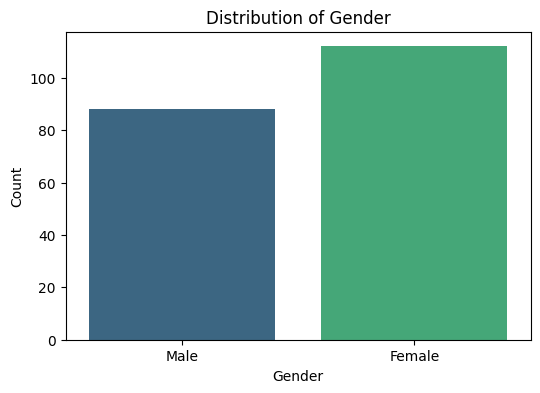

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=mall, hue='Gender', palette='viridis', legend=False)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

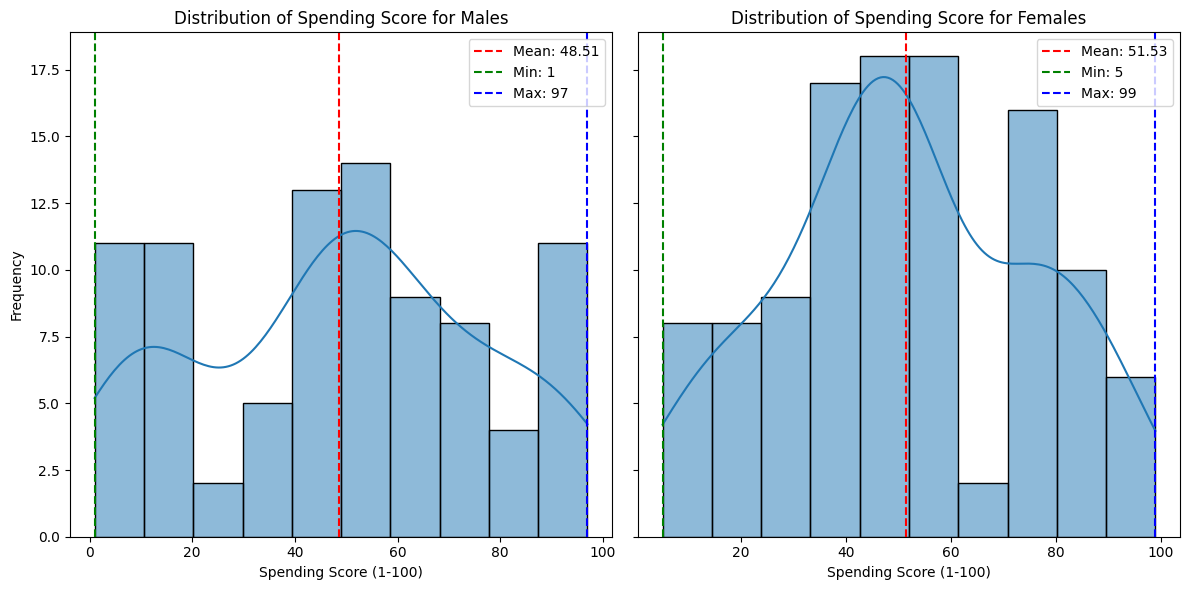

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# List of gender values and labels
genders = ['Male', 'Female']
labels = ['Males', 'Females']

for ax, gender, label in zip(axes, genders, labels):
    # Calculate mean, min, and max for 'Spending Score (1-100)'
    mean_score = mall['Spending Score (1-100)'][mall['Gender'] == gender].mean()
    min_score = mall['Spending Score (1-100)'][mall['Gender'] == gender].min()
    max_score = mall['Spending Score (1-100)'][mall['Gender'] == gender].max()
    
    # Plotting the distribution
    sns.histplot(mall['Spending Score (1-100)'][mall['Gender'] == gender], kde=True, bins=10, ax=ax)
    ax.axvline(mean_score, color='r', linestyle='--', label=f'Mean: {mean_score:.2f}')
    ax.axvline(min_score, color='g', linestyle='--', label=f'Min: {min_score}')
    ax.axvline(max_score, color='b', linestyle='--', label=f'Max: {max_score}')
    ax.set_title(f'Distribution of Spending Score for {label}')
    ax.set_xlabel('Spending Score (1-100)')
    ax.set_ylabel('Frequency')
    ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

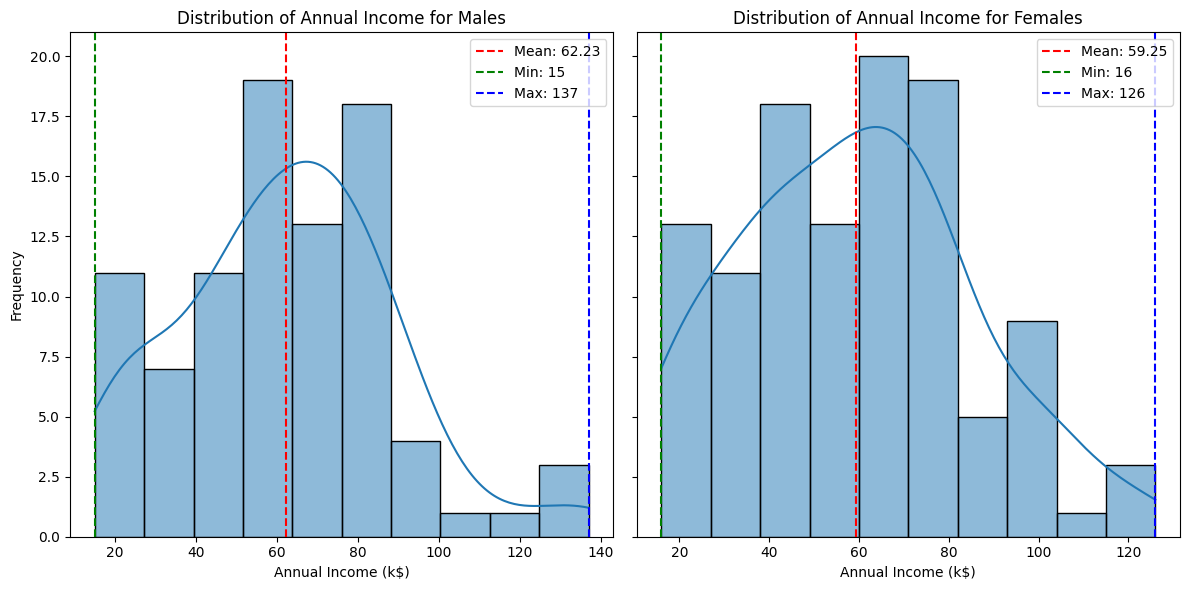

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# List of gender values and labels
genders = ['Male', 'Female']
labels = ['Males', 'Females']

for ax, gender, label in zip(axes, genders, labels):
    # Calculate mean, min, and max for 'Annual Income (k$)'
    mean_income = mall['Annual Income (k$)'][mall['Gender'] == gender].mean()
    min_income = mall['Annual Income (k$)'][mall['Gender'] == gender].min()
    max_income = mall['Annual Income (k$)'][mall['Gender'] == gender].max()
    
    # Plotting the distribution
    sns.histplot(mall['Annual Income (k$)'][mall['Gender'] == gender], kde=True, bins=10, ax=ax)
    ax.axvline(mean_income, color='r', linestyle='--', label=f'Mean: {mean_income:.2f}')
    ax.axvline(min_income, color='g', linestyle='--', label=f'Min: {min_income}')
    ax.axvline(max_income, color='b', linestyle='--', label=f'Max: {max_income}')
    ax.set_title(f'Distribution of Annual Income for {label}')
    ax.set_xlabel('Annual Income (k$)')
    ax.set_ylabel('Frequency')
    ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

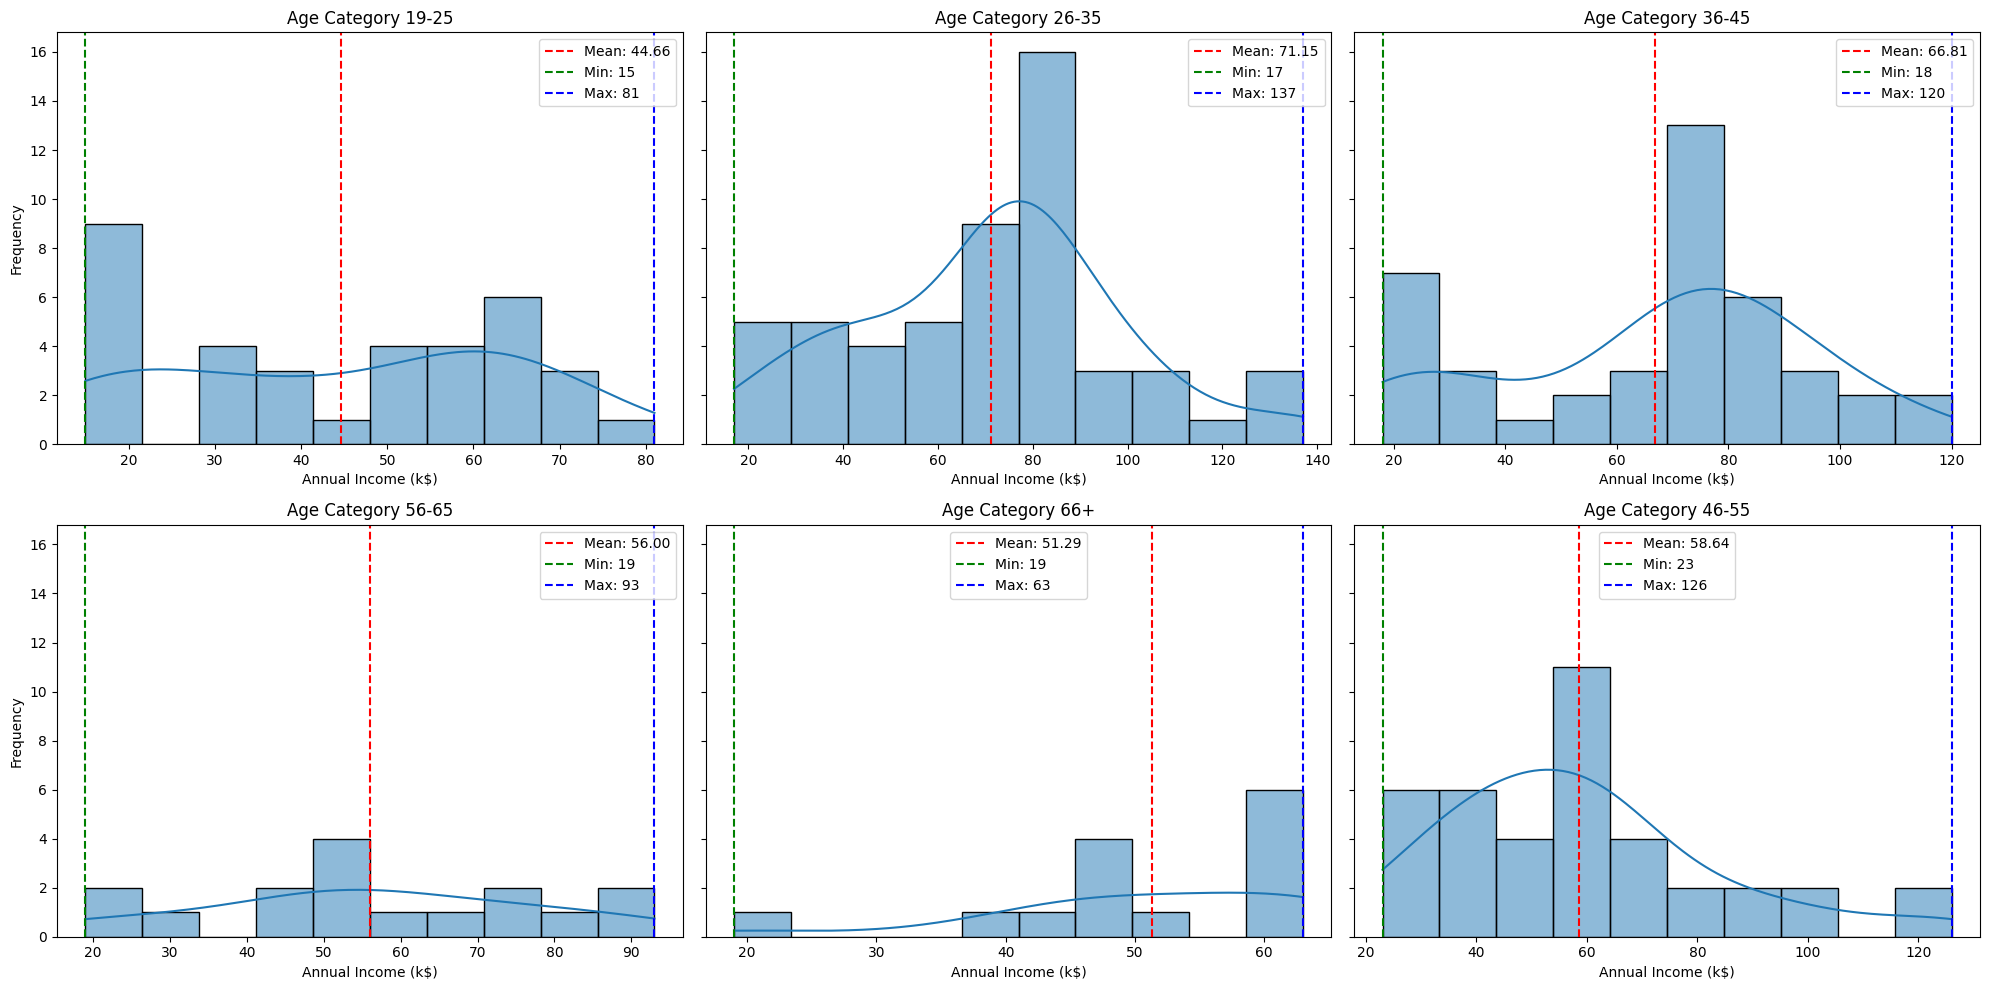

In [20]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
mall['Age Category'] = pd.cut(mall['Age'], bins=bins, labels=labels, right=False)

# Get unique age categories
age_categories = mall['Age Category'].unique()

# Prepare the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10), sharey=True)
axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate

# Plotting each age category
for ax, category in zip(axes, age_categories):
    # Calculate mean, min, and max for 'Annual Income (k$)' based on age category
    mean_income = mall['Annual Income (k$)'][mall['Age Category'] == category].mean()
    min_income = mall['Annual Income (k$)'][mall['Age Category'] == category].min()
    max_income = mall['Annual Income (k$)'][mall['Age Category'] == category].max()
    
    # Plotting the distribution
    sns.histplot(mall['Annual Income (k$)'][mall['Age Category'] == category], kde=True, bins=10, ax=ax)
    ax.axvline(mean_income, color='r', linestyle='--', label=f'Mean: {mean_income:.2f}')
    ax.axvline(min_income, color='g', linestyle='--', label=f'Min: {min_income}')
    ax.axvline(max_income, color='b', linestyle='--', label=f'Max: {max_income}')
    ax.set_title(f'Age Category {category}')
    ax.set_xlabel('Annual Income (k$)')
    ax.set_ylabel('Frequency')
    ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

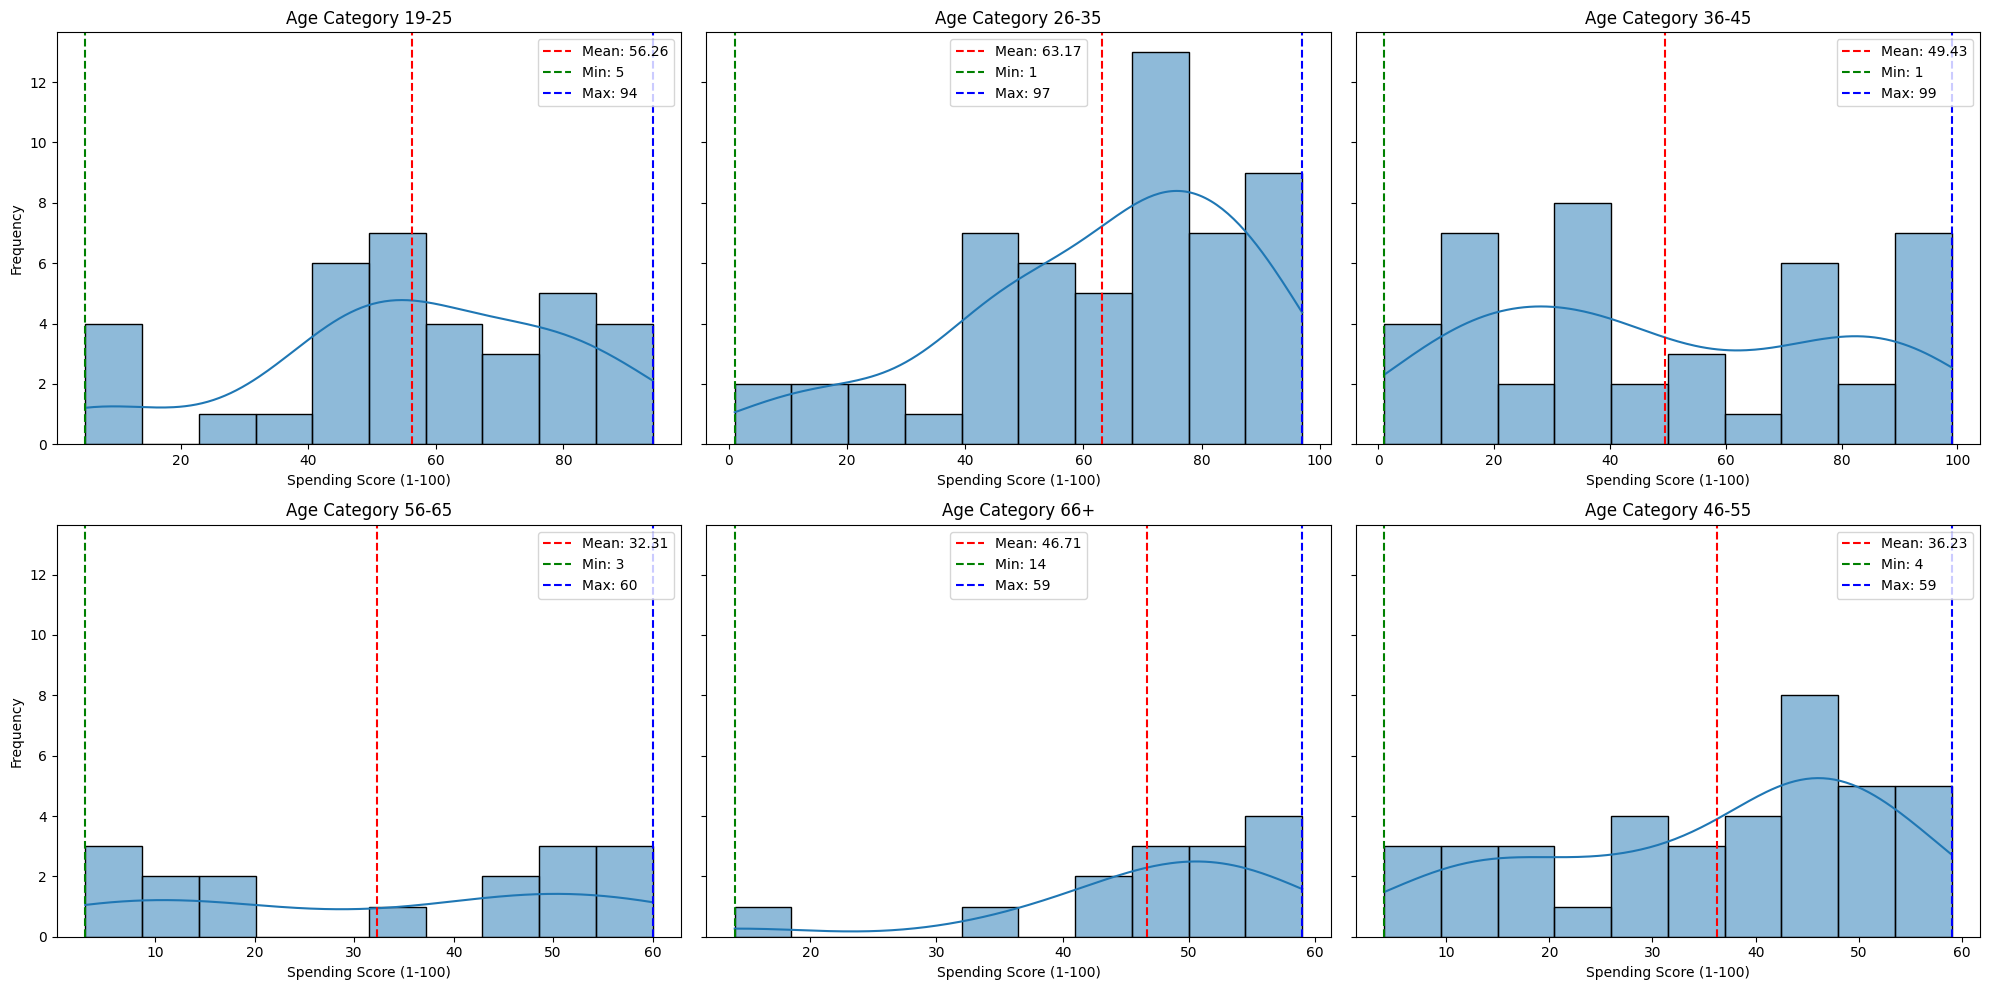

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10), sharey=True)
axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate

# Plotting each age category
for ax, category in zip(axes, age_categories):
    # Calculate mean, min, and max for 'Spending Score (1-100)' based on age category
    mean_score = mall['Spending Score (1-100)'][mall['Age Category'] == category].mean()
    min_score = mall['Spending Score (1-100)'][mall['Age Category'] == category].min()
    max_score = mall['Spending Score (1-100)'][mall['Age Category'] == category].max()
    
    # Plotting the distribution
    sns.histplot(mall['Spending Score (1-100)'][mall['Age Category'] == category], kde=True, bins=10, ax=ax)
    ax.axvline(mean_score, color='r', linestyle='--', label=f'Mean: {mean_score:.2f}')
    ax.axvline(min_score, color='g', linestyle='--', label=f'Min: {min_score}')
    ax.axvline(max_score, color='b', linestyle='--', label=f'Max: {max_score}')
    ax.set_title(f'Age Category {category}')
    ax.set_xlabel('Spending Score (1-100)')
    ax.set_ylabel('Frequency')
    ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

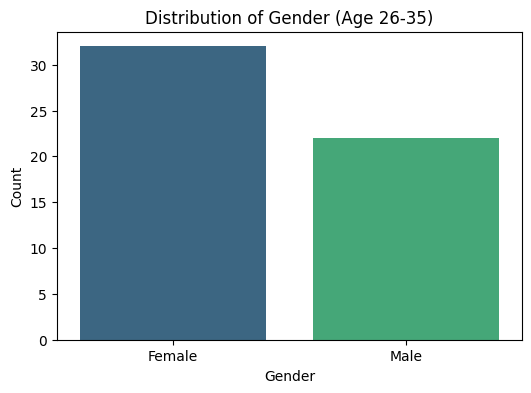

In [22]:
filtered_mall = mall[mall['Age Category'] == '26-35']

# Plotting the distribution of gender for the '26-35' age category
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=filtered_mall, palette='viridis', hue='Gender', legend=False)
plt.title('Distribution of Gender (Age 26-35)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

mall.drop(columns=['Age Category'] , inplace=True)

In [23]:
mall['Gender'] = mall['Gender'].map({'Male': 1, 'Female': 0})

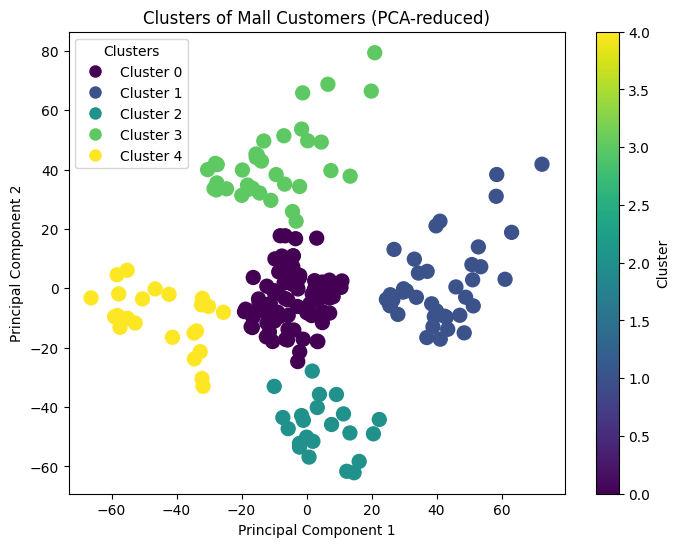

In [24]:
pca = PCA(n_components=2)
mall_pca = pca.fit_transform(mall)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(mall_pca)

# Add the cluster results to the DataFrame
mall['cluster'] = clusters

# Plotting the clusters with PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(mall_pca[:, 0], mall_pca[:, 1], c=clusters, cmap='viridis', s=100)

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10, linestyle='') for i in range(5)]
labels = [f'Cluster {i}' for i in range(5)]
plt.legend(handles=handles, labels=labels, title='Clusters')

plt.title('Clusters of Mall Customers (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [25]:
mall['cluster'].value_counts()

cluster
0    82
1    39
3    34
4    23
2    22
Name: count, dtype: int64